In [1]:
import edahan as ed
import pandas as pd
import numpy as np

server = 'aiap-training.database.windows.net'
database = 'aiap'
username = 'apprentice'
password = 'Pa55w.rd'
driver= '{ODBC Driver 17 for SQL Server}'
query = 'SELECT * FROM transactions LEFT JOIN towns ON transactions.town_id = towns.town_id LEFT JOIN flat_models ON transactions.flatm_id = flat_models.flatm_id'
csv_path = 'flats.csv'

pd.set_option('display.max_colwidth', None)
pd.set_option("display.precision", 2)

# ed.sql_query_to_csv(server, database, username, password, driver, query, csv_path)
df = ed.load_csv(csv_path)

/Users/han/Code/Pre-AIAP-main/assignment2/edahan.py:289: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ('tfm', transformer)


In [2]:
df = ed.load_csv('../assignment1/data/raw/data.csv')

# Missing Values

In [ ]:

#! CHECK MISSING: GENERATE REPORT
ed.rows_n_missing_report(df)
# rows with 23 columns or more missing: 20 (0.010%)
# rows with 14 columns or more missing: 40 (0.020%)
# rows with 10 columns or more missing: 60 (0.030%)
# rows with 1 columns or more missing: 934 (0.468%)


#! CHECK MISSING: BY COLUMN
ed.list_missing_indices(df['country_of_birth_father'])
# [8037,
#  28058,
#  48077,
#  50977,
#  69316]

#! CHECK MISSING: BY COLUMN, ENTIRE DF4
ed.missing_rows_per_col(df)
# COLUMN                   ROWS MISSING           %
# age                                20        0.0%
# enroll_in_edu_inst_last_wk         20        0.0%
# hispanic_origin                   894        0.4%
# sex_y                              20        0.0%



#! CHECK MISSING: BY INDICES, HOW MANY COLS MISSING
ed.rows_n_missing_counts(df)
# 2141      23
# 5495      23
#           ..
# 70202      1
# 70410      1
# 100482     1
# Length: 934, dtype: int64


#! CHECK MISSING: BY INDICES, HOW MANY INDICES WITH AT LEAST N COLS MISSING
ed.rows_n_missing_counts(df, ncols=20)
# [2141,
#  5495,
#  8596,
#  189690,
#  198778]

# Cleaning

In [ ]:

#! REGEX REPLACE
# This sample method expects the following input values:
# '47'
# '47 years'
# '47 years 6 months'
# and outputs years in float. e.g. 47.5
df['age_yr_float'] = df['age'].apply(regex_extract_numbers)

#! REPLACE
df['something'] = df.['something'].replace({
    'NA' : NaN,
    '2' : 'male',
    '1' : 'female'
})


# EDA

,age,capital_gains
count,199503.00,199503.00
mean,34.49,434.22
std,22.31,4692.45
min,0.00,0.00
25%,15.00,0.00
50%,33.00,0.00
75%,50.00,0.00
max,90.00,99999.00


High school graduate                      48400
Children                                  47416
Some college but no degree                27818
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8006
10th grade                                 7556
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6229
Associates degree-occup /vocational        5357
Associates degree-academic program         4362
5th or 6th grade                           3277
12th grade no diploma                      2126
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: education, dtype: int64

White                          167350
Black                           20411
Asian or Pacific Islander        5835
Other                            3657
A

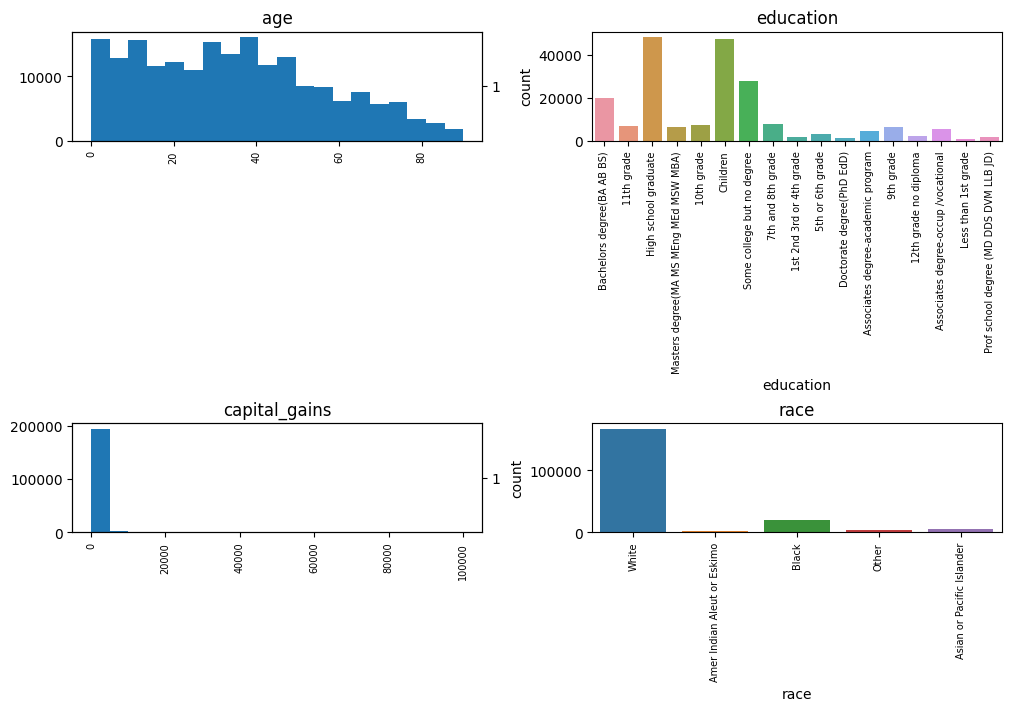

In [11]:

#! UNIVARIATE REPORTS: SUMMARY STATS, HIST/BOXPLOTS, COUNTPLOTS
cols = ['age', 'education', 'capital_gains', 'race']
ed.univariate_reports(df, cols, bins=20, nrows=2, ncols=2, figsize=(10,7))

- We could use shapiro wilks etc tests if we need to strictly test for normal distributions etc.
- normal distributions -> scale
- power law distributions -> log transform and scale
- all others -> quantile


In [ ]:

#! QUANTILE (pd.qcut)
df['age_quantiled'] = ed.column_quantile(df['age'], quantiles=4)

#! BIN (pd.cut)
df['age_binned'] = ed.column_bin(df['age'], bins=10)

#! LOG TRANSFORM
# new cols with suffix _log will be appended to df
ed.column_logtransform(df, cols)

#! OUTLIERS


# Column Transformer, Pipeline

In [ ]:
transformer = ed.create_transformer(numcols, catcols)
classifier = RandomForestClassifier()
pipe = ed.create_pipeline(transformer, classifier)
pipe.fit(X, y)